In [6]:
import os
import numpy as np
import rasterio
import xarray as xr
import hvplot.xarray
import holoviews as hv

In [7]:
os.environ['AWS_REQUEST_PAYER'] = 'requester'
os.environ['AWS_DEFAULT_REGION'] = 'US-WEST-2'
# os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
# os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS'] = 'TIF, JPG'
# os.environ['VSI_CACHE'] = 'True'

In [8]:
img = xr.open_rasterio('s3://sentinel-s2-l2a/tiles/12/S/XG/2018/12/16/0/R10m/TCI.jpg')

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


RasterioIOError: '/vsis3/sentinel-s2-l2a/tiles/12/S/XG/2018/12/16/0/R10m/TCI.jpg' does not exist in the file system, and is not recognized as a supported dataset name.

In [5]:
with rasterio.open('/Volumes/tjds/consult/12SXG/R10m/TCI.jp2', driver='JPEG') as src:
    img = xr.open_rasterio(src, chunks={'x': 512, 'y': 512})

RasterioIOError: '/Volumes/tjds/consult/12SXG/R10m/TCI.jp2' not recognized as a supported file format.

In [30]:
img

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
dask.array<shape=(3, 10980, 10980), dtype=uint8, chunksize=(3, 512, 512)>
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 4.2e+06 4.2e+06 4.2e+06 ... 4.09e+06 4.09e+06 4.09e+06
  * x        (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
Attributes:
    transform:   (10.0, 0.0, 600000.0, 0.0, -10.0, 4200000.0)
    crs:         +init=epsg:32612
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan, nan, nan)

In [6]:
img = xr.open_rasterio('/Volumes/tjds/consult/12SXG/R10m/TCI.jp2', parse_coordinates=True, chunks={'x': 512, 'y': 512})
img

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
dask.array<shape=(3, 10980, 10980), dtype=uint8, chunksize=(3, 512, 512)>
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 4.2e+06 4.2e+06 4.2e+06 ... 4.09e+06 4.09e+06 4.09e+06
  * x        (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
Attributes:
    transform:   (10.0, 0.0, 600000.0, 0.0, -10.0, 4200000.0)
    crs:         +init=epsg:32612
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan, nan, nan)

In [ ]:
imgd = [b for b in img]
xs, ys = img['x'], img['y']
hv.RGB((xs, ys[::-1], imgd[0], imgd[1], imgd[2]))

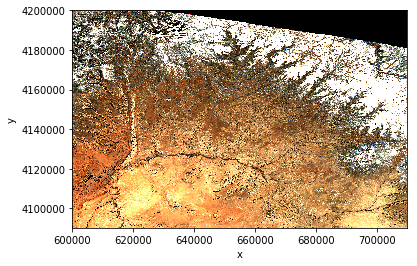

In [10]:
%matplotlib inline
img.plot.imshow()

In [27]:
from holoviews.operation.datashader import regrid, shade


ValueError: [1, 2, 0] not found in array dimensions ('band', 'y', 'x')

In [20]:
img.hvplot(rasterize=True)

:DynamicMap   []
   :RGB   [x,y]   (R,G,B)